<a href="https://colab.research.google.com/github/VitorGrava/Trabalho-Python-/blob/main/Trabalho_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRABALHO DE ESTATÍSTICA EM PYTHON

O trabalho poderá ser feito em grupos de 3 componentes. Preparar uma apresentação com os códigos e os resultados obtidos. Data da apresentação 09/11.

Escolher um arquivo csv pasta Trabalho de Estatística. Após definir o arquivo a ser analisado, definir o target(y) e um atributo(x).

A partir dos valores de x e y obter os seguintes resultados:

a) Média, variância, desvio padrão e mediana para x e y.

b) O histograma de x e y.

c) O boxplot de x e y.

d) O coeficiente de correlação de x e y.

e) Fazer a reta ajusta para as variáveis x e y.

In [ ]:
import random
random.seed(42)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

tabela=pd.read_csv("dados_banco.csv") # se o arquivo for csv

print("Número de linhas e colunas no conjunto de treinamento:", tabela.shape)
attributes = list(tabela.columns)
tabela.head(10)

Número de linhas e colunas no conjunto de treinamento: (10000, 11)


,Unnamed: 0,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
0,75928,75928,M,32,Privada,5719.00,933.79,0.00,0.00,6023.68,0
1,52921,52921,F,28,Privada,5064.00,628.37,0.00,0.00,1578.24,0
2,8387,8387,F,24,Autônomo,4739.00,889.18,0.00,0.00,2578.70,0
3,54522,54522,M,30,Pública,5215.00,1141.47,0.00,0.00,4348.96,0
4,45397,45397,M,30,Autônomo,5215.56,520.70,0.00,0.00,1516.78,1
5,59597,59597,M,34,Privada,5443.00,783.61,0.00,0.00,3585.23,0
6,81859,81859,F,29,Privada,4977.42,540.36,0.00,0.00,4485.24,1
7,52067,52067,F,33,Privada,5337.08,472.37,0.00,0.00,3714.89,1
8,51380,51380,M,32,Autônomo,5234.00,945.52,15748.31,9482.78,0.00,0
9,68076,68076,M,32,Privada,5492.00,1121.00,0.00,0.00,2400.88,0



a) Média, variância, desvio padrão e mediana para x e y.

In [ ]:
x = tabela[tabela.columns[3]]
y = tabela[tabela.columns[5]]
x=x.astype(float)
y=y.astype(float)
print("Média de idades:", "{:.2f}".format(x.mean()))
print("Média de salário:", "{:.2f}".format(y.mean()))
print("Variância de idades:", "{:.2f}".format(x.var()))
print("Variância de salário:", "{:.2f}".format(y.var()))
print("Desvio padrão de idades:", "{:.2f}".format(x.std()))
print("Desvio padrão de salário:", "{:.2f}".format(y.std()))
print("Mediana de idades:", "{:.2f}".format(x.median()))
print("Mediana de salário:", "{:.2f}".format(y.median()))


Média de idades: 31.80
Média de salário: 5482.88
Variância de idades: 8.60
Variância de salário: 155062.25
Desvio padrão de idades: 2.93
Desvio padrão de salário: 393.78
Mediana de idades: 32.00
Mediana de salário: 5498.78


b) O histograma de x e y.

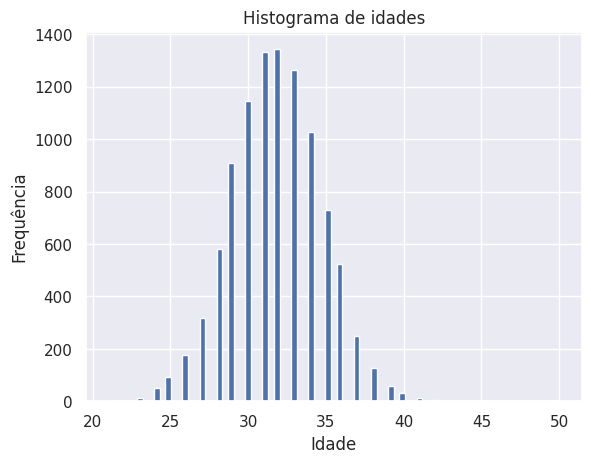

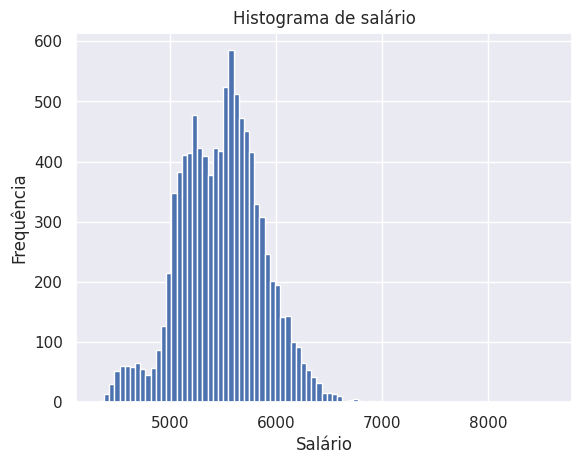

In [ ]:
plt.hist(x, bins = 'auto')
plt.title('Histograma de idades')
plt.ylabel('Frequência')
plt.xlabel('Idade')
plt.show()
plt.hist(y, bins = 'auto')
plt.title('Histograma de salário')
plt.ylabel('Frequência')
plt.xlabel('Salário')
plt.show()

Histograma de relação entre idade e salários

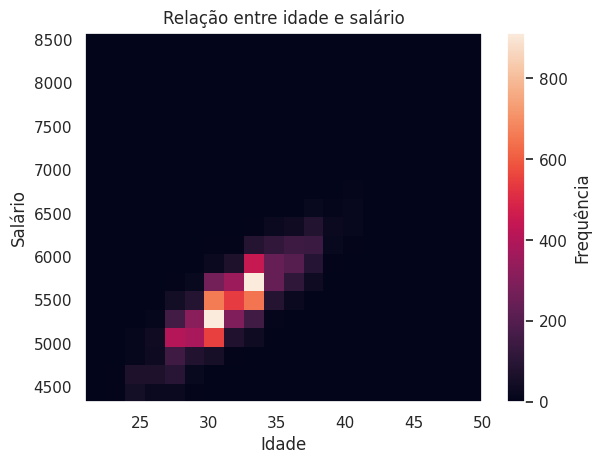

In [ ]:
plt.hist2d(x,y, bins = 20) #mudar esse valor depois, foi um valor arbitrário
plt.colorbar(label='Frequência')
plt.title("Relação entre idade e salário")
plt.ylabel('Salário')
plt.xlabel('Idade')
plt.show()


c) O boxplot de x e y.

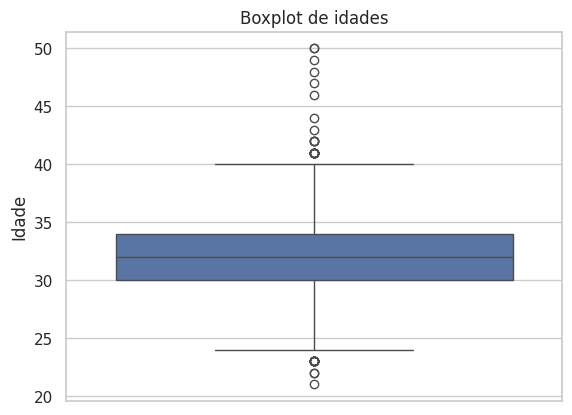

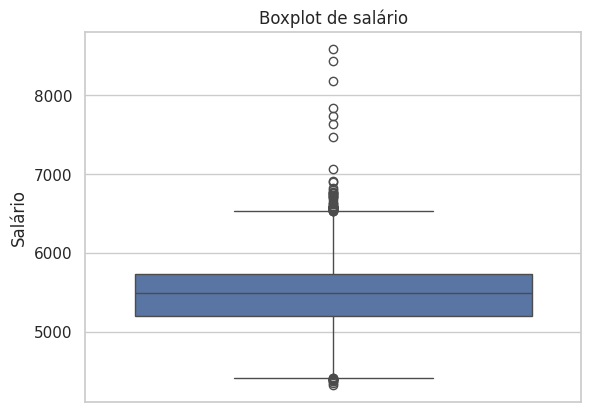

In [ ]:
sns.set(style = 'whitegrid')
sns.boxplot(x)
plt.title('Boxplot de idades')
plt.ylabel('Idade')
plt.show()
sns.boxplot(y)
plt.title('Boxplot de salário')
plt.ylabel('Salário')
plt.show()

d) O coeficiente de correlação de x e y.

In [ ]:
print(np.corrcoef(x,y))

[[1.         0.85066608]
 [0.85066608 1.        ]]


e) Fazer a reta ajusta para as variáveis x e y

1849.4729277100269
[114.25126519]


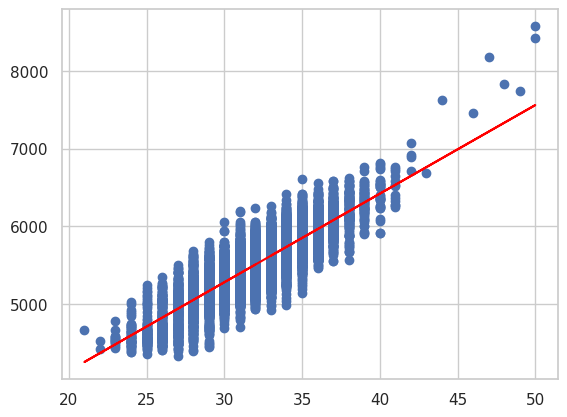

In [ ]:
lm = LinearRegression()
x = x.values.reshape(-1, 1)
result=lm.fit(x, y) #regressão linaer
print(result.intercept_) #valor de b
print(result.coef_)# valor do coeficiente angular
y_pred = lm.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')